In [2]:
with open("zombies_data.csv", "r") as f:
  lines= f.readlines()

In [3]:
X1, X2, Y = [], [], []

In [4]:
for line in lines[1:]:
  line= line.strip()
  speed, ammo, result= line.split(",")
  X1.append(float(speed))
  X2.append(float(ammo))
  Y.append(float(result))

In [5]:
print(X1)
print(X2)
print(Y)

[12.0, 14.5, 10.0, 18.0, 8.5, 15.0, 22.0, 11.0, 13.0, 20.5, 24.0, 16.0, 12.5, 28.0, 9.0, 25.0, 14.0, 19.0, 10.5, 26.5, 15.5, 17.0]
[0.0, 1.0, 2.0, 0.0, 4.0, 1.0, 0.0, 5.0, 2.0, 1.0, 2.0, 3.0, 0.0, 0.0, 6.0, 1.0, 4.0, 2.0, 2.0, 2.0, 5.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array(X1)
X2 = np.array(X2)
Y  = np.array(Y)

In [11]:
# standardization: (x - mean) / std
speed_mean = X1.mean()
speed_std = X1.std()
ammo_mean  = X2.mean()
ammo_std= X2.std()

X1_norm = (X1 - speed_mean) / speed_std
X2_norm = (X2 - ammo_mean)  / ammo_std
m = len(X1_norm)

In [12]:
X = np.column_stack((np.ones(m), X1_norm, X2_norm))   #shape (m x 3)
m, n = X.shape
print("X shape:", X.shape, "Y shape:", Y.shape)

X shape: (22, 3) Y shape: (22,)


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:
theta = np.zeros(n)     # n = 3

learning_rate = 0.1
epochs = 1000

costs = []

for i in range(epochs):
    # Linear part
    z = X @ theta

    # Predicted probabilities
    y_hat = sigmoid(z)

    # Cost: Binary Cross-Entropy
    # Add small epsilon to avoid log(0)
    eps = 1e-15
    cost = -(1/m) * np.sum(Y * np.log(y_hat + eps) + (1 - Y) * np.log(1 - y_hat + eps))
    costs.append(cost)

    # Gradients
    error = y_hat - Y
    grad = (1/m) * (X.T @ error)

    theta -= learning_rate * grad




In [15]:
# Check final parameters
print("Final theta:", theta)


Final theta: [1.01972078 4.65003674 3.44179708]


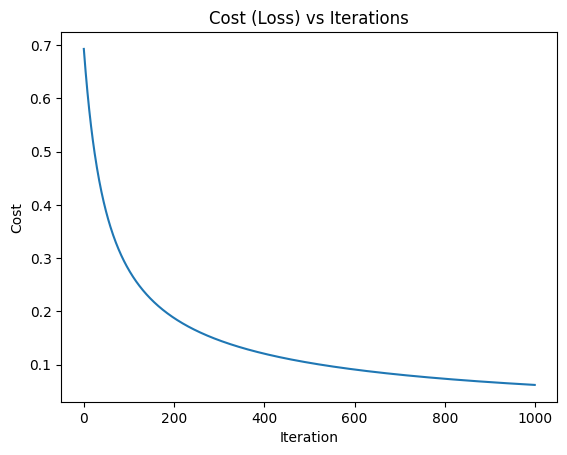

In [16]:
plt.plot(range(epochs), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost (Loss) vs Iterations")
plt.show()


In [21]:
test_speed = 25.0
test_ammo  = 1.0

# Normalize using training stats
test_speed_norm = (test_speed - speed_mean) / speed_std
test_ammo_norm  = (test_ammo  - ammo_mean)  / ammo_std

# Build test feature vector (shape = (3x))
x_test = np.array([1.0, test_speed_norm, test_ammo_norm])

# Prediction
prob_survive = sigmoid(x_test @ theta)
pred_label = 1 if prob_survive >= 0.5 else 0

print(f"Survival probability: {prob_survive:.4f}")
print(f"Predicted class (1=survive, 0=infected): {pred_label}")



Survival probability: 0.9973
Predicted class (1=survive, 0=infected): 1


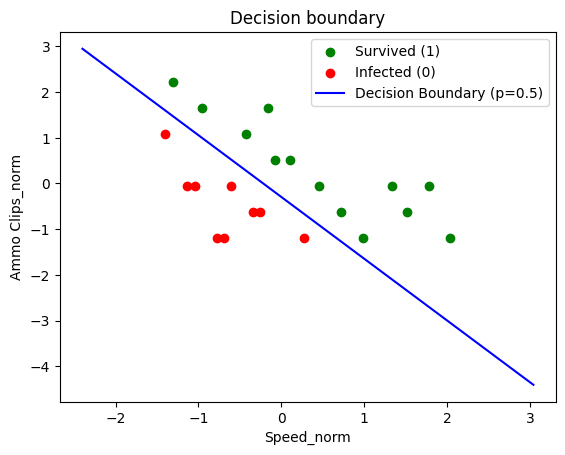

In [25]:
plt.figure()

# Scatter plot of data points colored by class
survive = (Y == 1)
infected = (Y == 0)

plt.scatter(X1_norm[survive],  X2_norm[survive], color="green", label="Survived (1)")
plt.scatter(X1_norm[infected], X2_norm[infected],color="red", label="Infected (0)")

# Decision boundary (prob = 0.5)
x1_vals = np.linspace(X1_norm.min() - 1, X1_norm.max() + 1, 200)

theta0, theta1, theta2 = theta
x2_vals = -(theta0 + theta1 * x1_vals) / theta2

plt.plot(x1_vals, x2_vals, color="blue", label="Decision Boundary (p=0.5)")

plt.xlabel("Speed_norm")
plt.ylabel("Ammo Clips_norm")
plt.title("Decision boundary")
plt.legend()
plt.show()



In [26]:
probs = sigmoid(X @ theta)
preds = (probs >= 0.5).astype(int)
accuracy = np.mean(preds == Y)
print( accuracy)


Training accuracy: 1.0
